# LIFE EXPECTANCY AT BIRTH

# IMPORTING LIBRARY 

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
import xgboost as xg
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_excel(r"C:\Users\sudarson.SUDARSON\Downloads\datas\New folder\makeovermonday-life-expectancy-at-birth-by-country\makeovermonday-life-expectancy-at-birth-by-country\Life Expectancy at Birth.xlsx")

In [3]:
data

,Country,Country Code,Region,Income Group,Year,Life Expectancy
0,Aruba,ABW,Latin America & Caribbean,High income,1960,65.569366
1,Afghanistan,AFG,South Asia,Low income,1960,32.328512
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,32.984829
3,Albania,ALB,Europe & Central Asia,Upper middle income,1960,62.254366
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN
...,...,...,...,...,...,...
14723,Kosovo,XKX,Europe & Central Asia,Lower middle income,2015,71.346341
14724,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,2015,64.031390
14725,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2015,57.440902
14726,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2015,60.785683


In [4]:
data["Income Group"].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income', nan], dtype=object)

# CHECKING NULL VALUES

In [5]:
data.isnull().sum()

Country               0
Country Code          0
Region             2576
Income Group       2576
Year                  0
Life Expectancy    1230
dtype: int64

In [6]:
data[data["Region"].isnull()]

,Country,Country Code,Region,Income Group,Year,Life Expectancy
5,Arab World,ARB,NaN,NaN,1960,46.852780
34,Central Europe and the Baltics,CEB,NaN,NaN,1960,67.823762
47,Caribbean small states,CSS,NaN,NaN,1960,62.313972
59,East Asia & Pacific (excluding high income),EAP,NaN,NaN,1960,45.467581
60,Early-demographic dividend,EAR,NaN,NaN,1960,45.145913
...,...,...,...,...,...,...
14700,Middle East & North Africa (IDA & IBRD countries),TMN,NaN,NaN,2015,72.476299
14702,South Asia (IDA & IBRD),TSA,NaN,NaN,2015,68.433245
14703,Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN,NaN,2015,58.974621
14711,Upper middle income,UMC,NaN,NaN,2015,74.871426


In [7]:
data[data.Country=="Arab World"]

,Country,Country Code,Region,Income Group,Year,Life Expectancy
5,Arab World,ARB,NaN,NaN,1960,46.852780
268,Arab World,ARB,NaN,NaN,1961,47.432448
531,Arab World,ARB,NaN,NaN,1962,48.010502
794,Arab World,ARB,NaN,NaN,1963,48.591241
1057,Arab World,ARB,NaN,NaN,1964,49.175538
1320,Arab World,ARB,NaN,NaN,1965,49.758702
1583,Arab World,ARB,NaN,NaN,1966,50.330956
1846,Arab World,ARB,NaN,NaN,1967,50.886334
2109,Arab World,ARB,NaN,NaN,1968,51.424443
2372,Arab World,ARB,NaN,NaN,1969,51.951470


In [8]:
data[data["Life Expectancy"].isnull()]

,Country,Country Code,Region,Income Group,Year,Life Expectancy
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN
9,American Samoa,ASM,East Asia & Pacific,Upper middle income,1960,NaN
25,Bermuda,BMU,North America,High income,1960,NaN
49,Curacao,CUW,Latin America & Caribbean,High income,1960,NaN
50,Cayman Islands,CYM,Latin America & Caribbean,High income,1960,NaN
...,...,...,...,...,...,...
14674,San Marino,SMR,Europe & Central Asia,High income,2015,NaN
14687,Sint Maarten (Dutch part),SXM,Latin America & Caribbean,High income,2015,NaN
14690,Turks and Caicos Islands,TCA,Latin America & Caribbean,High income,2015,NaN
14707,Tuvalu,TUV,East Asia & Pacific,Upper middle income,2015,NaN


In [9]:
data[data.Country=="Andorra"]

,Country,Country Code,Region,Income Group,Year,Life Expectancy
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN
267,Andorra,AND,Europe & Central Asia,High income,1961,NaN
530,Andorra,AND,Europe & Central Asia,High income,1962,NaN
793,Andorra,AND,Europe & Central Asia,High income,1963,NaN
1056,Andorra,AND,Europe & Central Asia,High income,1964,NaN
1319,Andorra,AND,Europe & Central Asia,High income,1965,NaN
1582,Andorra,AND,Europe & Central Asia,High income,1966,NaN
1845,Andorra,AND,Europe & Central Asia,High income,1967,NaN
2108,Andorra,AND,Europe & Central Asia,High income,1968,NaN
2371,Andorra,AND,Europe & Central Asia,High income,1969,NaN


# DROPING NULL VALUES DATA

In [10]:
data1=data.dropna()
data1=data1.reset_index(drop=True)

In [11]:
data1

,Country,Country Code,Region,Income Group,Year,Life Expectancy
0,Aruba,ABW,Latin America & Caribbean,High income,1960,65.569366
1,Afghanistan,AFG,South Asia,Low income,1960,32.328512
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,32.984829
3,Albania,ALB,Europe & Central Asia,Upper middle income,1960,62.254366
4,United Arab Emirates,ARE,Middle East & North Africa,High income,1960,52.243220
...,...,...,...,...,...,...
10917,Kosovo,XKX,Europe & Central Asia,Lower middle income,2015,71.346341
10918,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,2015,64.031390
10919,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2015,57.440902
10920,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2015,60.785683


In [12]:
data1["Country"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia, The', 'Gu

In [13]:
data1["Country Code"].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE',
       'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP',
       'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KIR', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY',
       'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA',
       'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG',
       'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA',
       'NIC', 'NLD',

In [14]:
data1["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [15]:
data1[data1["Region"]=="South Asia"].head(30)

,Country,Country Code,Region,Income Group,Year,Life Expectancy
1,Afghanistan,AFG,South Asia,Low income,1960,32.328512
15,Bangladesh,BGD,South Asia,Lower middle income,1960,45.829317
26,Bhutan,BTN,South Asia,Lower middle income,1960,32.359366
79,India,IND,South Asia,Lower middle income,1960,41.171951
100,Sri Lanka,LKA,South Asia,Lower middle income,1960,59.747146
109,Maldives,MDV,South Asia,Upper middle income,1960,37.268634
129,Nepal,NPL,South Asia,Low income,1960,35.170829
132,Pakistan,PAK,South Asia,Lower middle income,1960,45.290463
190,Afghanistan,AFG,South Asia,Low income,1961,32.777439
204,Bangladesh,BGD,South Asia,Lower middle income,1961,46.457927


In [16]:
d2=data1[data1["Year"]==1960]
d2

,Country,Country Code,Region,Income Group,Year,Life Expectancy
0,Aruba,ABW,Latin America & Caribbean,High income,1960,65.569366
1,Afghanistan,AFG,South Asia,Low income,1960,32.328512
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,32.984829
3,Albania,ALB,Europe & Central Asia,Upper middle income,1960,62.254366
4,United Arab Emirates,ARE,Middle East & North Africa,High income,1960,52.243220
...,...,...,...,...,...,...
184,Samoa,WSM,East Asia & Pacific,Upper middle income,1960,49.969512
185,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,1960,34.363805
186,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,1960,49.036293
187,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1960,45.109805


# COUNTING INCOME GROUP IN A PARTICULAR YEAR

<AxesSubplot:xlabel='Income Group', ylabel='count'>

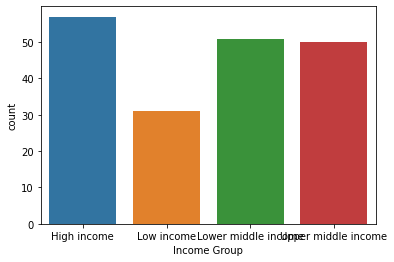

In [17]:
sns.countplot(x="Income Group",data=d2)

In [18]:
data1.isnull().sum()

Country            0
Country Code       0
Region             0
Income Group       0
Year               0
Life Expectancy    0
dtype: int64

In [19]:
d1=data1[data1["Country"]=="India"]
d1

,Country,Country Code,Region,Income Group,Year,Life Expectancy
79,India,IND,South Asia,Lower middle income,1960,41.171951
268,India,IND,South Asia,Lower middle income,1961,41.790488
458,India,IND,South Asia,Lower middle income,1962,42.417415
648,India,IND,South Asia,Lower middle income,1963,43.052732
837,India,IND,South Asia,Lower middle income,1964,43.698415
1027,India,IND,South Asia,Lower middle income,1965,44.353512
1216,India,IND,South Asia,Lower middle income,1966,45.018512
1406,India,IND,South Asia,Lower middle income,1967,45.690927
1596,India,IND,South Asia,Lower middle income,1968,46.367756
1786,India,IND,South Asia,Lower middle income,1969,47.047000


# LINE PLOT FOR INDIA'S LIFE EXPECTANCY

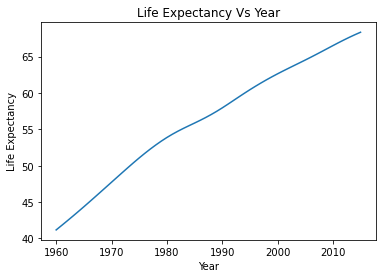

In [20]:
plt.plot(d1.Year,d1["Life Expectancy"])
plt.title('Life Expectancy Vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

In [21]:
x=data1.iloc[0:,[0,2,3,4]]
y=data1.iloc[0:,5]
x

,Country,Region,Income Group,Year
0,Aruba,Latin America & Caribbean,High income,1960
1,Afghanistan,South Asia,Low income,1960
2,Angola,Sub-Saharan Africa,Lower middle income,1960
3,Albania,Europe & Central Asia,Upper middle income,1960
4,United Arab Emirates,Middle East & North Africa,High income,1960
...,...,...,...,...
10917,Kosovo,Europe & Central Asia,Lower middle income,2015
10918,"Yemen, Rep.",Middle East & North Africa,Lower middle income,2015
10919,South Africa,Sub-Saharan Africa,Upper middle income,2015
10920,Zambia,Sub-Saharan Africa,Lower middle income,2015


# LABEL ENCODING DISCRETE DATA

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [23]:
le=preprocessing.LabelEncoder()

In [24]:
col = list(x)
col

['Country', 'Region', 'Income Group', 'Year']

In [25]:
for i in range(0,len(col)):
    if(col[i]!="Year"):
        x1 = le.fit(x[col[i]])
        x2 = x1.transform(x[col[i]])
        x2= pd.DataFrame(x2)
        x[col[i]]=x2

In [26]:
x

,Country,Region,Income Group,Year
0,7,2,0,1960
1,0,5,1,1960
2,3,6,2,1960
3,1,1,3,1960
4,194,3,0,1960
...,...,...,...,...
10917,99,1,2,2015
10918,204,3,2,2015
10919,168,6,3,2015
10920,205,6,2,2015


In [27]:
x["Country"].unique()

array([  7,   0,   3,   1, 194,   5,   6,   4,   8,   9,  10,  28,  16,
        18,  27,  13,  26,  12,  11,  22,  15,  17,  21,  24,  14,  25,
        20,  23,  33,  32, 180,  35,  36,  37,  43,  31,  40,  41,  38,
        39,  29,  42,  45,  47,  48,  68,  50,  49,  52,   2,  53,  54,
        57, 170,  58,  59,  62,  61,  63, 123,  65, 195,  67,  69,  75,
        66,  76,  56,  70,  72,  74,  73,  77,  80,  79,  44,  78,  81,
        84,  83,  87,  85,  86,  82,  90,  91,  93,  92,  94,  95, 101,
        30,  96,  98, 100, 102, 104, 106, 107, 173, 171, 105, 109, 110,
       103, 111, 127, 124, 113, 116, 122, 112, 117, 118, 129, 126, 125,
       128, 120, 121, 114, 115, 130, 133, 136, 137, 135, 132, 138, 131,
       134, 139, 140, 142, 145, 146, 143, 147, 149,  97, 148, 144,  64,
       150, 151, 152, 153, 157, 176, 158, 162, 166, 161,  55, 167, 169,
       156, 177, 164, 165, 179, 178, 181,  34, 186, 184, 182, 191, 185,
       187, 188, 189, 190, 183, 192, 193, 197, 196, 198, 175, 20

In [28]:
y

0        65.569366
1        32.328512
2        32.984829
3        62.254366
4        52.243220
           ...    
10917    71.346341
10918    64.031390
10919    57.440902
10920    60.785683
10921    59.161073
Name: Life Expectancy, Length: 10922, dtype: float64

# TRAIN TEST SPLIT

In [29]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)

# MODELS 

In [30]:
linearreg= LinearRegression().fit(trainx,trainy)
linearreg.predict(testx)
linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))


In [31]:
decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
decisionreg.predict(testx)
decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
  

In [32]:
randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
randomreg.predict(testx)
randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
        

In [33]:
adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
adabreg.predict(testx)
adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
    

In [34]:
gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
gradreg.predict(testx)
gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
    

In [35]:

xgboostreg= xg.XGBRegressor(n_estimators = 10, seed = 123).fit(trainx,trainy)
xgboostreg.predict(testx)
xgboostrms=sqrt(mean_squared_error(testy,xgboostreg.predict(testx),squared=False))
    

#  RESULT SCORE

In [38]:
print("LinearRegression          = ",linearreg.score(testx,testy))
print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
print("RandomForestRegressor     = ",randomreg.score(testx,testy))
print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
print("GradientBoostingRegressor = ",gradreg.score(testx,testy))
print("XGBoostingRegressor       = ",xgboostreg.score(testx,testy))
    
print("LinearRegression          rms   = ",linearrms)
print("Decision Tree Regressor   rms   = ",decisionrms)
print("RandomForestRegressor     rms   = ",randomrms)
print("AdaBoostRegressor         rms   = ",adabrms)
print("GradientBoostingRegressor rms   = ",gradrms)
print("XGBoostingRegressor       rms   = ",xgboostrms)

LinearRegression          =  0.5811677658618378
Decision Tree Regressor   =  0.9927892812198206
RandomForestRegressor     =  0.9488743862921504
AdaBoostRegressor         =  0.7642045746761487
GradientBoostingRegressor =  0.8682391500055822
XGBoostingRegressor       =  0.8746837236745677
LinearRegression          rms   =  2.7286563048409556
Decision Tree Regressor   rms   =  0.9884016264199451
RandomForestRegressor     rms   =  1.6128665885985807
AdaBoostRegressor         rms   =  2.3635927847694913
GradientBoostingRegressor rms   =  2.043550661521178
XGBoostingRegressor       rms   =  2.018090705434854


# COMBINING ORIGINAL DATA WITH LABEL ENCODING

In [39]:
c=data1["Country"]
x1=x["Country"]
country=pd.concat([c,x1],axis=1)
country.columns=["Country","Countrys"]
country

,Country,Countrys
0,Aruba,7
1,Afghanistan,0
2,Angola,3
3,Albania,1
4,United Arab Emirates,194
...,...,...
10917,Kosovo,99
10918,"Yemen, Rep.",204
10919,South Africa,168
10920,Zambia,205


In [40]:
#'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa','Europe & Central Asia', 'Middle East & North Africa','East Asia & Pacific', 'North America'
x["Region"].unique()

array([2, 5, 6, 1, 3, 0, 4])

In [41]:
r=data1["Region"]
x2=x["Region"]
region=pd.concat([r,x2],axis=1)
region.columns=["Region","Regions"]
region

,Region,Regions
0,Latin America & Caribbean,2
1,South Asia,5
2,Sub-Saharan Africa,6
3,Europe & Central Asia,1
4,Middle East & North Africa,3
...,...,...
10917,Europe & Central Asia,1
10918,Middle East & North Africa,3
10919,Sub-Saharan Africa,6
10920,Sub-Saharan Africa,6


In [42]:
i=data1["Income Group"]
x3=x["Income Group"]
income=pd.concat([i,x3],axis=1)
income.columns=["Income Group","Income"]
income

,Income Group,Income
0,High income,0
1,Low income,1
2,Lower middle income,2
3,Upper middle income,3
4,High income,0
...,...,...
10917,Lower middle income,2
10918,Lower middle income,2
10919,Upper middle income,3
10920,Lower middle income,2


In [43]:
data1["Country"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia, The', 'Gu

In [44]:
data1["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [45]:
data1["Income Group"].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

# NEW INPUT DATA

In [ ]:
c=input("Enter country Name =  ") 
r=input("Enter the Region =  ")
i=input("Enter the Income Group =  ")
y=int(input("Enter a Year =  "))
c1=country.Countrys[country.Country == c].min()
r1=region.Regions[region.Region == r].min()
i1=income.Income[income["Income Group"]== i].min()
#incomegroup=['Low income', 'Lower middle income','Upper middle income','High income']
new_data=pd.DataFrame(np.array([[c1,r1,i1,y]]),columns=["Country","Region","Income","Year"])
answer=decisionreg.predict(new_data)
print("life expectancy of ",i,"in",c,"is =" ,answer)

In [ ]:
#One hot encoding
region=pd.get_dummies(df.region, prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)
df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [ ]:
#Feature Selection 
y=df.charges.values
X=df[['age', 'bmi', 'smoker', 'children', 'location_northeast', 'location_northwest', 'location_southeast', 'location_southwest']]
#Split data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Scaling numeric features using sklearn StandardScalar
numeric=['age', 'bmi', 'children']
sc=StandardScalar()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))


dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


In [ ]:
from sklearn.cluster import KMeans
features=['age', 'bmi', 'smoker', 'children', 'location_northeast', 'location_northwest', 'location_southeast', 'location_southwest']
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[features])
df['cust_type'] = kmeans.predict(df[features])
df['location_north']=df.apply(lambda x: get_north(x['location_northeast'], x['location_northwest']), axis=1)
df['location_south']=df.apply(lambda x: get_south(x['location_southwest'], x['location_southeast']), axis=1)
df['more_than_1_child']=df.children.apply(lambda x:1 if x>1 else 0)

In [ ]:
X=df[['age', 'bmi', 'smoker', 'more_than_1_child', 'cust_type', 'location_north', 'location_south']]
#Split test and train data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)
round(r2_score(y_test, yhat), 3), round(mean_absolute_error(y_test, yhat), 2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

In [ ]:
X=df[['age', 'bmi', 'smoker', 'more_than_1_child', 'cust_type', 'location_north', 'location_south']]
model = RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train, y_train)
yhat = ttr.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
import xgboost

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
 pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))